In [443]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [444]:
%matplotlib inline
sns.set_theme(style="darkgrid")

DIR_DATASET = r'/Users/dev-rocks/Documents/TCC - Data Science e Big Data/Projeto/datasets/'

colunas = ['id','descricaoTipo','tipoDocumento','tema','tokens']

dfProposicoes = pd.read_csv(f'{DIR_DATASET}proposicoesUnificado.csv', sep=';', low_memory=False,usecols=colunas)
dfProposicoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149175 entries, 0 to 149174
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             149175 non-null  int64 
 1   descricaoTipo  149175 non-null  object
 2   tipoDocumento  149175 non-null  object
 3   tema           53268 non-null   object
 4   tokens         147784 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.7+ MB


In [3]:
dfStopWords = pd.read_csv(f'{DIR_DATASET}stop_words.csv', usecols=['stop_words']) \
.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["", ""])

listaStopWords = dfStopWords['stop_words'].values.tolist()

dfStopWords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stop_words  637 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB


In [454]:
dfProposicoesClassificadas = dfProposicoes.loc[dfProposicoes['tema'].isna()==False]
dfProposicoesClassificadas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53268 entries, 0 to 149154
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             53268 non-null  int64 
 1   descricaoTipo  53268 non-null  object
 2   tipoDocumento  53268 non-null  object
 3   tema           53268 non-null  object
 4   tokens         53268 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.4+ MB


In [455]:
dfProposicoesClassificadas['id'].astype('str').describe()

count       53268
unique      30491
top       2270418
freq            6
Name: id, dtype: object

In [6]:
dfClassificacao = pd.crosstab(index=[dfProposicoesClassificadas['id']],columns=dfProposicoesClassificadas['tema'])
dfClassificacao

tema,Administração Pública,"Agricultura, Pecuária, Pesca e Extrativismo","Arte, Cultura e Religião",Cidades e Desenvolvimento Urbano,"Ciência, Tecnologia e Inovação",Ciências Exatas e da Terra,Ciências Sociais e Humanas,Comunicações,Defesa e Segurança,Direito Civil e Processual Civil,...,"Indústria, Comércio e Serviços",Meio Ambiente e Desenvolvimento Sustentável,"Política, Partidos e Eleições",Previdência e Assistência Social,Processo Legislativo e Atuação Parlamentar,Relações Internacionais e Comércio Exterior,Saúde,Trabalho e Emprego,Turismo,"Viação, Transporte e Mobilidade"
id,,,,,,,,,,,,,,,,,,,,,
308880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
317970,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427339,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
459323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
498347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314507,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2314512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2314519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
dfTreino = dfProposicoesClassificadas[['id','descricaoTipo','tokens']].drop_duplicates()
dfTreino = pd.merge(dfTreino,dfClassificacao,left_on='id',right_index=True)

print(f'[INFO  ] Quantidade de instâncias: {len(dfTreino)}\n[INFO  ] Número de atributos: {len(dfTreino.columns)}')
print('.'*80)
dfTreino.info()

[INFO  ] Quantidade de instâncias: 30491
[INFO  ] Número de atributos: 35
................................................................................
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30491 entries, 0 to 149154
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   id                                           30491 non-null  int64 
 1   descricaoTipo                                30491 non-null  object
 2   tokens                                       30491 non-null  object
 3   Administração Pública                        30491 non-null  int64 
 4   Agricultura, Pecuária, Pesca e Extrativismo  30491 non-null  int64 
 5   Arte, Cultura e Religião                     30491 non-null  int64 
 6   Cidades e Desenvolvimento Urbano             30491 non-null  int64 
 7   Ciência, Tecnologia e Inovação               30491 non-null  int64 
 8   

In [8]:
tokens = []
for t in dfTreino['tokens'].values:
    tokens.extend(t.split())

palavrasVocabulario = (list(set(tokens)))
print(f'[INFO  ] Quantidade de palavras: {len(tokens)}')
print(f'[INFO  ] Tamanho do vocabulário: {len(palavrasVocabulario)}')


[INFO  ] Quantidade de palavras: 6296814
[INFO  ] Tamanho do vocabulário: 135042


In [10]:
dfTreino['qtdPalavras'] = dfTreino['tokens'].apply(lambda t:len(t.split()))
maiorQtdPalavras = dfTreino['qtdPalavras'].max()
dfTreino[['tokens','qtdPalavras']].nlargest(10,'qtdPalavras')

,tokens,qtdPalavras
55681,redação setembro alterou julho código eleitora...,22455
23,estabelece medidas corrupção crimes patrimônio...,13557
42248,dispõe regimes resolução instituições autoriza...,13521
62041,dispõe transferência imóveis fundo regime prev...,13425
48970,altera fevereiro julho atualizar legislação re...,12557
2304,modifica previdência social estabelece regras ...,12472
46931,redefine traçado parque joaquim altera parque ...,11271
37894,institui plano regional desenvolvimento nordes...,10711
50810,dispõe futebol profissional providências comis...,9147
10446,dispõe futebol profissional providências felip...,9078


In [194]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vetorizador = CountVectorizer()
tfidf =TfidfTransformer()

# vetorizador = TfidfVectorizer(sublinear_tf=True, stop_words=listaStopWords)

rotulos = list(dfTreino.iloc[:,3:-2].columns.values)

X_counts = vetorizador.fit_transform(dfTreino['tokens'])
X = tfidf.fit_transform(X_counts)
y = dfTreino[rotulos].values

print(f'[INFO  ] Dimensões do X: {X.shape}')
print(f'[INFO  ] Dimensões do y: {y.shape}')



[INFO  ] Dimensões do X: (30491, 133814)
[INFO  ] Dimensões do y: (30491, 31)


<1x133814 sparse matrix of type '<class 'numpy.float64'>'
	with 106 stored elements in Compressed Sparse Row format>

In [190]:
from skmultilearn.model_selection import iterative_train_test_split
np.random.seed(45)
X_treino,y_treino,X_teste,y_teste = iterative_train_test_split(X,y,test_size=0.2)

print(f'[INFO  ] Dimensões do X_treino: {X_treino.shape}')
print(f'[INFO  ] Dimensões do y_treino: {y_treino.shape}')

print(f'[INFO  ] Dimensões do X_teste: {X_teste.shape}')
print(f'[INFO  ] Dimensões do y_teste: {y_teste.shape}')

[INFO  ] Dimensões do X_treino: (24392, 133814)
[INFO  ] Dimensões do y_treino: (24392, 31)
[INFO  ] Dimensões do X_teste: (6099, 133814)
[INFO  ] Dimensões do y_teste: (6099, 31)


In [191]:
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

listaModelos = [
  (SGDClassifier(alpha=0.0001, max_iter=50, penalty='l2'), 'SGD panalidade l2'),
  (SGDClassifier(alpha=0.0001, max_iter=50, penalty='l1'), 'SGD panalidade l1'),
  (SGDClassifier(alpha=0.0001, max_iter=50, penalty="elasticnet"),'SGD elasticnet'),
  (LinearSVC(penalty='l2', dual=False, tol=1e-3), 'Linear SVC penalidade l2'),
  (LinearSVC(penalty='l1', dual=False, tol=1e-3), 'Linear SVC penalidade l1'),
  (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
  (Perceptron(max_iter=50), "Perceptron"),
  (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
  (NearestCentroid(), 'NearestCentroid '),
  (MultinomialNB(alpha=0.01), ' Naive Bayes - MultinomialNB'),
  (BernoulliNB(alpha=0.01), ' Naive Bayes - BernoulliNB'),
  (ComplementNB(alpha=0.01), ' Naive Bayes - ComplementNB'),
  (Pipeline(
    [
      (
          "feature_selection",
          SelectFromModel(LinearSVC(penalty="l2", dual=False, tol=1e-3)),
      ),
      ("classificador", LinearSVC(penalty="l2")),
    ]
  ), 'LinearSVC c/ feature selection'),
#     (RandomForestClassifier(), "Random forest"),
#     (MLPClassifier(max_iter=100, random_state=1, verbose=False)), 'MLP Classifier'),
    (LogisticRegression(solver='sag'),'Logistic Regression - SAG'),
    (LogisticRegression(solver='lbfgs',random_state=0),'Logistic Regression - LBFGS'),
#     (KNeighborsClassifier(n_neighbors=10), "kNN")
]

In [195]:
from sklearn.multioutput import MultiOutputClassifier
from time import time
resultadoMultiLabel =[]

for modelo in listaModelos:
    print('='* 80)
    print(f'[PROCESSANDO MODELO]: {modelo[1]}')
    
    estatisticas = {
        'modelo':modelo[1],
        'acuracia':0,
        'tempoTreino':0,
        'tempoTeste':0
    }
    
    classificador = modelo[0]
    multioutput = MultiOutputClassifier(classificador)
    inicio = time()
    
    multioutput.fit(X_treino,y_treino)
    tempoTreino = time()-inicio
    
    
    inicio = time()
    predicao = multioutput.predict(X_teste)
    tempoTeste = time()-inicio
    acuracia = metrics.accuracy_score(y_teste, predicao)
    
    estatisticas['acuracia'] = acuracia
    estatisticas['tempoTeste'] = tempoTeste
    estatisticas['tempoTreino'] = tempoTreino

    
    resultadoMultiLabel.append(estatisticas)
    
    
    print(f'\n[INFO  ] Acurácia ===== {estatisticas["acuracia"]*100:.2f}%')
    print(f'[INFO  ] Tempo treino = {estatisticas["tempoTreino"]:.2f} segundos')
    print(f'[INFO  ] Tempo teste == {estatisticas["tempoTeste"]:.2f} segundos')
    print('_'* 80)


[PROCESSANDO MODELO]: SGD panalidade l2

[INFO  ] Acurácia ===== 42.66%
[INFO  ] Tempo treino = 4.56 segundos
[INFO  ] Tempo teste == 0.15 segundos
________________________________________________________________________________
[PROCESSANDO MODELO]: SGD panalidade l1

[INFO  ] Acurácia ===== 39.32%
[INFO  ] Tempo treino = 7.18 segundos
[INFO  ] Tempo teste == 0.14 segundos
________________________________________________________________________________
[PROCESSANDO MODELO]: SGD elasticnet

[INFO  ] Acurácia ===== 40.76%
[INFO  ] Tempo treino = 10.45 segundos
[INFO  ] Tempo teste == 0.14 segundos
________________________________________________________________________________
[PROCESSANDO MODELO]: Linear SVC penalidade l2

[INFO  ] Acurácia ===== 46.66%
[INFO  ] Tempo treino = 23.71 segundos
[INFO  ] Tempo teste == 0.15 segundos
________________________________________________________________________________
[PROCESSANDO MODELO]: Linear SVC penalidade l1

[INFO  ] Acurácia ===== 45.68%

In [196]:
dfBenchmark_1 = pd.DataFrame(resultadoMultiLabel)
dfBenchmark_1.sort_values(by='acuracia',ascending=False)

,modelo,acuracia,tempoTreino,tempoTeste
12,LinearSVC c/ feature selection,0.467618,38.933285,0.603588
3,Linear SVC penalidade l2,0.466634,23.709083,0.145989
4,Linear SVC penalidade l1,0.456796,40.875750,0.149341
5,Ridge Classifier,0.438433,38.711639,0.141190
7,Passive-Aggressive,0.429251,9.359465,0.141411
0,SGD panalidade l2,0.426627,4.559749,0.145773
6,Perceptron,0.410231,3.215560,0.138166
2,SGD elasticnet,0.407608,10.449692,0.140792
1,SGD panalidade l1,0.393179,7.182517,0.138109
13,Logistic Regression - SAG,0.379242,51.519686,0.171776


In [197]:
dfBenchmark_1.describe()

,acuracia,tempoTreino,tempoTeste
count,15.000000,15.000000,15.000000
mean,0.385353,21.164258,0.280587
std,0.076077,24.055007,0.217652
min,0.241843,1.355876,0.138109
25%,0.376127,2.841897,0.141301
50%,0.407608,9.359465,0.149341
75%,0.433842,38.822462,0.411188
max,0.467618,81.386913,0.835257


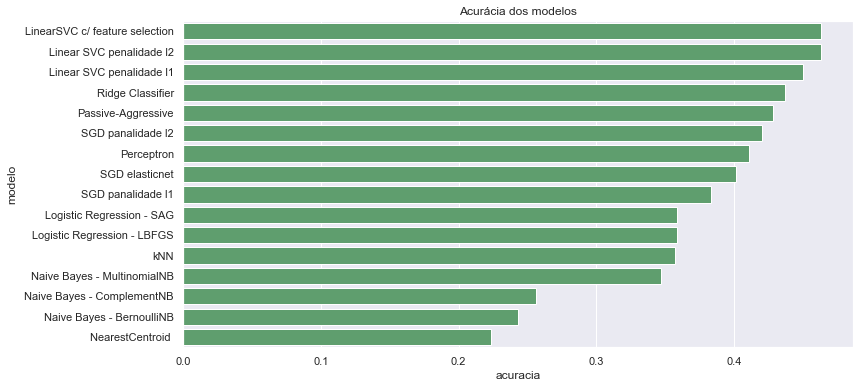

In [20]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="acuracia", y="modelo", data=dfBenchmark_1.sort_values(by='acuracia',ascending=False),
 color="g")

ax.set(title='Acurácia dos modelos')

f.show()


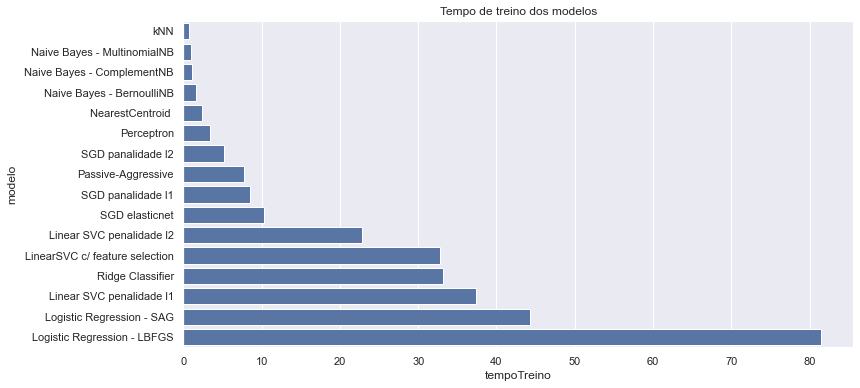

In [35]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="tempoTreino", y="modelo", data=dfBenchmark_1.sort_values(by='tempoTreino',ascending=True),
 color="b")

ax.set(title='Tempo de treino dos modelos')

f.show()

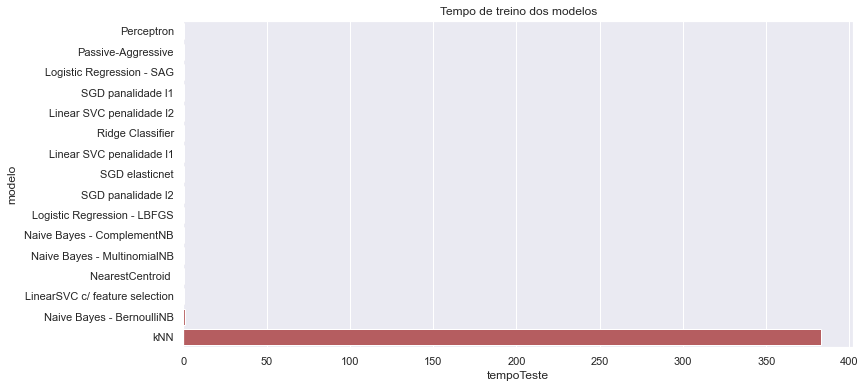

In [36]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="tempoTeste", y="modelo", data=dfBenchmark_1.sort_values(by='tempoTeste',ascending=True),
 color="r")

ax.set(title='Tempo de treino dos modelos')

f.show()

In [198]:
from time import time
resultadoSingleLabel = []

for modelo in listaModelos:
    estatisticas = {
        'modelo':modelo[1],
        'acuracia':0,
        'tempoTreino':0,
        'tempoTeste':0,
        'acuraciaDetalhada':[] 
    }
    
    print('='* 80)
    print(f'[PROCESSANDO MODELO]: {modelo[1]}')

    classificador = modelo[0]
    acuraciaAcumulada = 0
    acuracia=0
    tempoTesteTotal = 0
    tempoTreinoTotal=0
    
    for i in range(len(rotulos)):
        inicio = time()
        classificador.fit(X_treino,y_treino[:,i])
        tempoTreinoTotal += time() - inicio
        
        inicio=time()
        predicao = classificador.predict(X_teste)
        tempoTesteTotal += time() - inicio

        acuraciaAcumulada += metrics.accuracy_score(y_teste[:,i], predicao)
        estatisticas['acuraciaDetalhada'].append((rotulos[i], metrics.accuracy_score(y_teste[:,i], predicao)))
        
    
    estatisticas['acuracia'] = acuraciaAcumulada / len(rotulos)
    estatisticas['tempoTeste'] = tempoTesteTotal 
    estatisticas['tempoTreino'] = tempoTreinoTotal 

    
    resultadoSingleLabel.append(estatisticas)
    
    
    print(f'\n[INFO  ] Acurácia ===== {estatisticas["acuracia"]*100:.2f}')
    print(f'[INFO  ] Tempo treino = {estatisticas["tempoTreino"]:.2f} segundos')
    print(f'[INFO  ] Tempo teste == {estatisticas["tempoTeste"]:.2f} segundos')
    print('_'* 80)

    
    

[PROCESSANDO MODELO]: SGD panalidade l2

[INFO  ] Acurácia ===== 97.18
[INFO  ] Tempo treino = 4.22 segundos
[INFO  ] Tempo teste == 0.14 segundos
________________________________________________________________________________
[PROCESSANDO MODELO]: SGD panalidade l1

[INFO  ] Acurácia ===== 96.99
[INFO  ] Tempo treino = 7.32 segundos
[INFO  ] Tempo teste == 0.15 segundos
________________________________________________________________________________
[PROCESSANDO MODELO]: SGD elasticnet

[INFO  ] Acurácia ===== 97.07
[INFO  ] Tempo treino = 10.10 segundos
[INFO  ] Tempo teste == 0.15 segundos
________________________________________________________________________________
[PROCESSANDO MODELO]: Linear SVC penalidade l2

[INFO  ] Acurácia ===== 97.38
[INFO  ] Tempo treino = 22.52 segundos
[INFO  ] Tempo teste == 0.15 segundos
________________________________________________________________________________
[PROCESSANDO MODELO]: Linear SVC penalidade l1

[INFO  ] Acurácia ===== 97.34
[INF

In [205]:
dfBenchmark_2 = pd.DataFrame(resultadoSingleLabel)
dfBenchmark_2.sort_values(by='acuracia',ascending=False)

,modelo,acuracia,tempoTreino,tempoTeste,acuraciaDetalhada
12,LinearSVC c/ feature selection,0.973867,32.137632,0.659487,"[(Administração Pública, 0.8927693064436792), ..."
3,Linear SVC penalidade l2,0.973824,22.515423,0.153848,"[(Administração Pública, 0.8917855386128873), ..."
4,Linear SVC penalidade l1,0.973438,38.720280,0.221502,"[(Administração Pública, 0.8906378094769635), ..."
5,Ridge Classifier,0.972608,36.111493,0.149195,"[(Administração Pública, 0.8922774225282833), ..."
0,SGD panalidade l2,0.971793,4.224610,0.142107,"[(Administração Pública, 0.8883423512051156), ..."
2,SGD elasticnet,0.970656,10.098004,0.148421,"[(Administração Pública, 0.8848991637973438), ..."
7,Passive-Aggressive,0.970233,8.278213,0.149265,"[(Administração Pública, 0.8717822593867847), ..."
1,SGD panalidade l1,0.969858,7.323093,0.148147,"[(Administração Pública, 0.8794884407279882), ..."
13,Logistic Regression - SAG,0.968958,50.560746,0.146873,"[(Administração Pública, 0.8862108542383997), ..."
14,Logistic Regression - LBFGS,0.968953,79.975526,0.187741,"[(Administração Pública, 0.8862108542383997), ..."


In [206]:
dfBenchmark_2.describe()

,acuracia,tempoTreino,tempoTeste
count,15.000000,15.000000,15.000000
mean,0.964479,19.998577,0.296639
std,0.013733,23.243265,0.237339
min,0.927090,1.042728,0.142107
25%,0.967017,3.098628,0.148284
50%,0.969858,8.278213,0.153848
75%,0.972201,34.124563,0.351835
max,0.973867,79.975526,0.905052


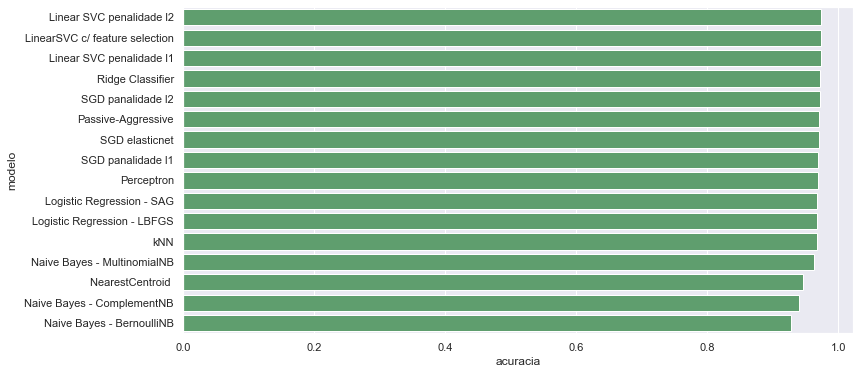

In [30]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="acuracia", y="modelo", data=dfBenchmark_2.sort_values(by='acuracia',ascending=False),color="g")

f.show()


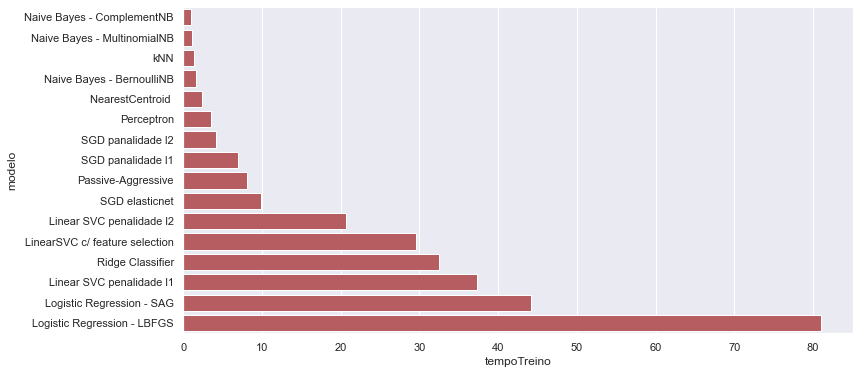

In [31]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="tempoTreino", y="modelo", data=dfBenchmark_2.sort_values(by='tempoTreino',ascending=True),
            label="tempoTreino", color="r")

f.show()

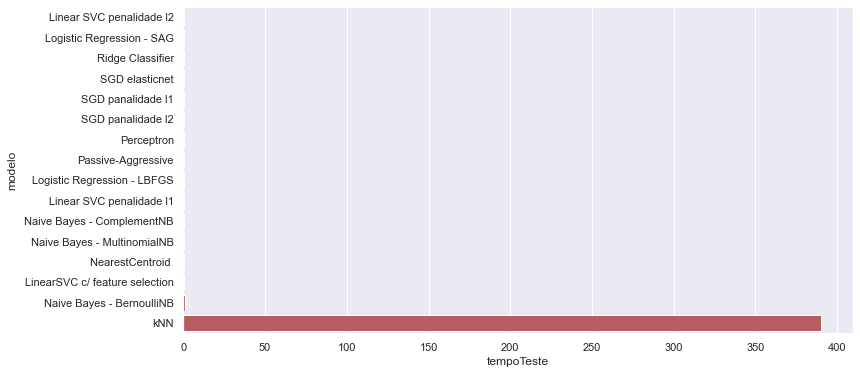

In [29]:
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x="tempoTeste", y="modelo", data=dfBenchmark_2.sort_values(by='tempoTeste',ascending=True),
            label="tempoTeste", color="r")

f.show()

In [43]:
def tokenizarTexto(texto: str,listaStopWords=[]):
    try:
        tamanhoTexto = len(texto.strip().split())
        
        pontuacao = ['{', '}','(', ')', ';', ':', '[', ']','#','%','*', '<','>','=','?',
                     ',', '-','_', '.', '$', '!', '?', '°', '§', '+','@',
                     'º', '/', '"', '\'','~','Ł','·','&','ˇ','ˆ','˝','˚','˛','˙','˘','˜','˝']
        texto = texto.replace('\\n', ' ')
        
        for ponto in pontuacao:
            texto = texto.replace(ponto, ' ')

        for numero in range(0, 10):
            texto = texto.replace(str(numero), '')

        tokens = texto.strip().split()
        palavrasChave = [palavra for palavra in tokens if not palavra.lower() in listaStopWords and len(palavra)>3]
        
       
        return (' '.join(palavrasChave).lower(), tamanhoTexto, len(palavrasChave))
    except Exception as e:
        print(f'[ERRO    ] Erro ao tokenizar texto: "{texto}" \n{e}')
        raise e
    

In [298]:
conteudos = [
    """
    redação arts decreto novembro dispõe nacional seguros privados regula operações seguros resseguros redação arts decreto novembro dispõe nacional seguros privados regula rações seguros resseguros congresso nacional decreta arts decreto novembro passam vigorar seguinte redação responsabilidade civil corretores seguros ressegu pessoa jurídica regulamentado resolução cnsp habilitação suse mediante prova capacidade técnico profissional contratação seguro previsto alínea decreto observados critérios fixados cnsp entra vigor data publicação brasília mfbrasília setembro excelentíssimo senhor presidente república submeto consideração excelên proposta encaminhado congresso nacional visa alterar decreto novembro objetivo instituir seguro obrigatório responsabilidade civil corretores seguro resseguro pessoa jurídica longo década mercado seguros brasileiro elevado crescimento modo arrecadação anua prêmios seguros corresponde aproximadamente produto interno bruto acrescentando economia nacional incremento recursos formadores poupança popular verifica independente fato segurados poderem contratar diretamente seguros sociedades guradoras prática operações securitárias passam intermed iação corretores seguros torna necessária criação seguro obrigatório responsabilidade civil corretores seguro pessoa jurídica existe qualquer mecanismo seguros decreto garanta segurado reparação quantoa possíveis danos praticados empresas responsáveis ande captação comissões corretagem cado nacional seguros privados imperioso registrar inclusive atualmente existe qualquer dispositivo legal garanta caução modalidade garantia ercício atividade econômica corretagem seguros empresas corretagem seguros outrossim necessário corretoras resseguros contratar seguro obrigatório responsabilid civil modo minimizar possíveis danos venham ocorrer exercício ativid ades econômicas intermediação resseguros código civil impende informar aumentou consideravelmente responsabilidade profissão corretores segu inclusive possibilidade responsabilização perdas danos suma presente proposta mecanismo defesa população brasileira consiste pilares atual governo nação senhor presidente razões levam submeter consideração excelência presente respeitosamente assinado eletronicamente antonio palocci filho
    """,
    """
    Na data em que apresentamos este Projeto de Lei para apreciação da Câmara dos Deputados, o Brasil concentra um total de 21,8 milhões de casos confirmados de Covid-19 e 607 mil mortes. À este cenário de catástrofe e emergência de saúde pública, gerenciado de maneira irresponsável e potencialmente criminosa pelo governo brasileiro – conforme reforça o recém publicado relatório da “CPI da Covid” do Senado Federal – soma-se uma profunda deterioração da economia e da vida do povo brasileiro, que enfrenta a carestia, o desemprego, a inflação, a insegurança alimentar e outras inúmeras dificuldades.
    Partindo da percepção de que a atuação do governo federal frente à pandemia no Brasil foi desastrosa, vez que marcada pelo negacionismo, pela busca de uma imunidade coletiva por contágio e pela promoção de medicamentos comprovadamente ineficazes para tratamento da Covid, entendemos ser de responsabilidade do Estado a garantia de uma pensão de caráter indenizatório/ reparatório aos sobreviventes que, em razão do vírus e/ou dos tratamentos médicos ineficazes promovidos pelo governo federal, apresentem sequelas temporárias ou permanentes que reduzem sua capacidade laborativa e/ou sua qualidade de vida.
    """,
    """
    Altera a Lei no 8.069, de 13 de julho de 1990 (Estatuto da Criança e do Adolescente), para dispor sobre a obrigação do poder público de adotar medidas de prevenção e combate ao abandono e à evasão escolares.
    O Congresso Nacional decreta:
    Art. 1o O art. 54 da Lei no 8.069, de 13 de julho de 1990 (Estatuto da Criança e do Adolescente), passar a vigorar com a seguinte redação:
    acg/pl-19-871-t
    Altera a Lei no 8.069, de 13 de julho de 1990 (Estatuto da Criança e do Adolescente), para dispor sobre a obrigação do poder público de adotar medidas de prevenção e combate ao abandono e à evasão escolares.
    “Art. 54. .................................................................................................. .......................................................................................................................... § 3o Compete ao poder público, na respectiva esfera de competência
    federativa, com o apoio técnico e financeiro da União, recensear anualmente as crianças e adolescentes em idade escolar, fazer-lhes a chamada pública e zelar, junto aos pais ou responsáveis, pela frequência à escola.
    § 4o O poder público adotará estratégias para prevenir e combater o abandono e a evasão escolares, inclusive por meio de visitas domiciliares, busca ativa e ações de articulação intersetorial com órgãos de saúde, assistência social e direitos humanos, em parceria com as famílias.” (NR) Art. 2o Esta Lei entra em vigor na data de sua publicação.
    """
]


'altera julho estatuto criança adolescente dispor obrigação público adotar medidas prevenção combate abandono evasão escolares congresso decreta julho estatuto criança adolescente passar vigorar seguinte redação altera julho estatuto criança adolescente dispor obrigação público adotar medidas prevenção combate abandono evasão escolares “art compete público respectiva esfera competência federativa técnico financeiro união recensear anualmente crianças adolescentes idade escolar chamada pública zelar junto pais responsáveis frequência escola público adotará estratégias prevenir combater abandono evasão escolares inclusive visitas domiciliares busca ativa ações articulação intersetorial órgãos saúde assistência social direitos humanos parceria famílias entra vigor data publicação'

In [300]:
def vetorizarTexto(texto:str):
    tokens, tamanhoInicial, tamanhoFinal = tokenizarTexto(texto,listaStopWords)
    df = pd.DataFrame([{'tokens':tokens}])
    conteudoVetorizado = vetorizador.transform(df['tokens'])

    return conteudoVetorizado

In [299]:
classificador = LinearSVC(penalty='l2', dual=False, tol=1e-3)

In [332]:
import copy
classificadores = []
for i in range(len(rotulos)):
    inicio=time()
    classificador.fit(X,y[:,i])
    tempoTreinoTotal += time() - inicio
    classificadores.append((rotulos[i],copy.deepcopy(classificador)))

print(f'[INFO  ] Tempo de treino:{tempoTreinoTotal:.2f} segundos')


[INFO  ] Tempo de treino:2652.48 segundos


[('Administração Pública', LinearSVC(dual=False, tol=0.001)),
 ('Agricultura, Pecuária, Pesca e Extrativismo',
  LinearSVC(dual=False, tol=0.001)),
 ('Arte, Cultura e Religião', LinearSVC(dual=False, tol=0.001)),
 ('Cidades e Desenvolvimento Urbano', LinearSVC(dual=False, tol=0.001)),
 ('Ciência, Tecnologia e Inovação', LinearSVC(dual=False, tol=0.001)),
 ('Ciências Exatas e da Terra', LinearSVC(dual=False, tol=0.001)),
 ('Ciências Sociais e Humanas', LinearSVC(dual=False, tol=0.001)),
 ('Comunicações', LinearSVC(dual=False, tol=0.001)),
 ('Defesa e Segurança', LinearSVC(dual=False, tol=0.001)),
 ('Direito Civil e Processual Civil', LinearSVC(dual=False, tol=0.001)),
 ('Direito Constitucional', LinearSVC(dual=False, tol=0.001)),
 ('Direito Penal e Processual Penal', LinearSVC(dual=False, tol=0.001)),
 ('Direito e Defesa do Consumidor', LinearSVC(dual=False, tol=0.001)),
 ('Direito e Justiça', LinearSVC(dual=False, tol=0.001)),
 ('Direitos Humanos e Minorias', LinearSVC(dual=False, tol=

In [388]:
classificacaoTematica = []

for tema, cls in classificadores:
    inicio=time()
    predicao = cls.predict(vetorizarTexto(dfParaClassificar.iloc[-778]['tokens']))
    tempoTesteTotal += time() - inicio
    classificacaoTematica.append((tema,predicao))
    
print(f'[INFO  ] Tempo de predicao:{tempoTesteTotal:.2f} segundos')
print('='*80)

for tema, classificacao in classificacaoTematica:
    if classificacao[0]:
         print( f'{tema}')

[INFO  ] Tempo de predicao:2.84 segundos
Administração Pública
Meio Ambiente e Desenvolvimento Sustentável
Previdência e Assistência Social
Saúde
Trabalho e Emprego


In [304]:
multioutput = MultiOutputClassifier(classificador)
inicio = time()
multioutput.fit(X,y)
tempoTreino = time()-inicio

print(f'[INFO  ] Tempo de treino:{tempoTreino:.2f} segundos')


[INFO  ] Tempo de treino:31.74 segundos


In [400]:
inicio = time()
predicao = multioutput.predict(vetorizarTexto(conteudos[1]))
tempoTeste = time()-inicio

print(f'[INFO  ] Tempo de predicao:{tempoTeste:.2f} segundos')
print('='*80)


for i,p in enumerate(predicao[0]):
    if p:
        print(f'{rotulos[i]}')



[INFO  ] Tempo de predicao:0.02 segundos
Direito Constitucional
Direito e Defesa do Consumidor
Previdência e Assistência Social
Saúde


In [401]:
dfParaClassificar = dfProposicoes.loc[
    (dfProposicoes['tema'].isna()) & (dfProposicoes['tokens'].isna()==False)]
dfParaClassificar.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 94516 entries, 41 to 149174
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             94516 non-null  int64 
 1   descricaoTipo  94516 non-null  object
 2   tipoDocumento  94516 non-null  object
 3   tema           0 non-null      object
 4   tokens         94516 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.3+ MB


In [436]:
resultadoClassificacao = []
inicio = time()

for index, linha in dfParaClassificar.iterrows():
    predicao = multioutput.predict(vetorizarTexto(linha['tokens']))
    for i,p in enumerate(predicao[0]):
        if p:
            resultadoClassificacao.append({'id':linha['id'],'tema':rotulos[i],'predicao':True})

tempoPredicao = time()-inicio
print(f'[INFO  ] Tempo de predicao:{tempoTreino:.2f} segundos')
print('='*80)

dfResultadoClassificacao = pd.DataFrame(resultadoClassificacao)
                                

[INFO  ] Tempo de treino:31.74 segundos


,id,tema,predicao
0,2190174,Processo Legislativo e Atuação Parlamentar,True
1,2190174,Trabalho e Emprego,True
2,2190289,Direito Constitucional,True
3,2190289,Homenagens e Datas Comemorativas,True
4,2190289,Processo Legislativo e Atuação Parlamentar,True
...,...,...,...
388392,2316251,Economia,True
388393,2316251,"Energia, Recursos Hídricos e Minerais",True
388394,2316251,Finanças Públicas e Orçamento,True
388395,2316251,Previdência e Assistência Social,True


In [471]:
dfParaClassificar.loc[dfParaClassificar['id']==2294714]

,id,descricaoTipo,tipoDocumento,tema,tokens
129682,2294714,Parecer Preliminar de Plenário,application/pdf,NaN,dezembro passa vigorar seguintes redações jkll...


In [438]:
dfResultadoClassificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388397 entries, 0 to 388396
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        388397 non-null  int64 
 1   tema      388397 non-null  object
 2   predicao  388397 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 6.3+ MB


In [432]:
dfClassificacao =  dfProposicoesClassificadas[['id','tema']]
dfClassificacao['predicao']=False

dfClassificacaoFinal = dfResultadoClassificacao.append(dfClassificacao)

dfClassificacaoFinal.groupby('predicao').count()

,id,tema
predicao,,
False,53268,53268
True,388397,388397


In [437]:
dfClassificacaoFinal['id'].astype('str').describe()

count      441665
unique     121220
top       2300849
freq           22
Name: id, dtype: object

In [440]:
import csv
dfClassificacaoFinal.to_csv(f'{DIR_DATASET}/classificacaoFinal.csv',index=False,sep=';',quoting=csv.QUOTE_ALL,  escapechar="\\")